## <center> Polytechnique Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8008 – Prétraitement de données <br> . <br> TP1  - Analyse descriptive des données<br>  Hiver 2025 <br> . <br> 20 janvier 2025 </center>

## Introduction

Le TD1 porte sur l'analyse descriptive de données.  Nous survolons l'utilisation de fonctions de base de Pandas et de l'analyse de données numériques et de leur visualisation.

Les données du fichier <b> ntsb-accidents.csv </b> proviennent d'une base de données sur les accidents d’aviation provenant du <a href = https://carol.ntsb.gov> National Transportation Safety Board </a>. Nous nous en inspirerons pour le travail des TPs de cette session.

Les champs du fichier de données <b> ntsb-accidents.csv </b> sont les suivants :

- **event_id** : Identifiant unique de l'événement (souvent un code de référence pour suivre chaque cas).
- **ntsb_make** : Fabricant de l'appareil impliqué dans l'événement (exemple : BELL, ROBINSON).
- **ntsb_model** : Modèle spécifique de l'appareil (exemple : R22 BETA, R44).
- **ntsb_number** : Code d'identification de l'incident assigné par la NTSB.
- **year** : Année où l'événement a eu lieu.
- **date** : Date et heure exactes de l'événement (année/mois/jour heure:minute:seconde).
- **city** : Ville où l'événement s'est produit.
- **state** : État ou province où l'événement s'est produit.
- **country** : Pays où l'événement a eu lieu.
- **total_fatalities** : Nombre total de décès associés à l'incident.
- **latimes_make** : Fabricant simplifié utilisé dans les rapports (exemple : BELL, ROBINSON).
- **latimes_model** : Modèle simplifié utilisé dans les rapports (exemple : R22, 369).
- **latimes_make_and_model** : Combinaison du fabricant et du modèle pour décrire l'appareil de manière concise (exemple : BELL 407, ROBINSON R44).



Les librairies python qui seront à utiliser pour ce TP sont les suivantes:
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html)
- [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html)




In [ ]:
import pandas as pd

## 1. Analyse des données numériques


### Q1
À l'aide de Pandas, chargez les données dans une variable nommée 'df'. Quelle est la dimension de 'df'? Combien y a-t-il de lignes et de colonnes? <b>(2 points)</b>

In [2]:
# Chargement et affichage de df

df = pd.read_csv('ntsb-accidents.csv')

In [3]:
# Complétez ce code afin d'afficher les bonnes informations dans les "print".

print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")
print("\n")

Nombre de lignes: 163
Nombre de colonnes: 13




### Q2
Quelle est l'intervalle d'années et l'ensemble des fabricants et modèles d'hélicoptères compris dans le jeu de données?<b>(1 point)</b>

In [5]:
print(f"Années: de {df['year'].min()} à {df['year'].max()}")
print("\nFabricants uniques:")
print(df['latimes_make'].unique())
print("\nModèles uniques:")
print(df['latimes_model'].unique())
print("\n")


Années: de 2006 à 2016

Fabricants uniques:
['BELL' 'ROBINSON' 'AIRBUS' 'HUGHES' 'SCHWEIZER' 'MCDONNELL DOUGLAS'
 'SIKORSKY' 'AGUSTA']

Modèles uniques:
['407' 'R22' 'R44' '350' '369' '269' '135' '206' '76' '109' '130']




### Q3
Combien de décès y a-t-il en moyenne? <b>(1 point)</b>

In [6]:
print(f"Moyenne des décès: {df['total_fatalities'].mean():.2f}")
print("\n")

Moyenne des décès: 2.06




### Q4
Combien d'**accidents** y a-t-il eu pour chaque combinaison de fabricant et modèle d'hélicoptère? Créez un tableau de fréquence du nombre d'accidents par combinaison de fabricant et modèle.  <b>(3 points)</b>


In [7]:
accident_freq = df['latimes_make_and_model'].value_counts()
print(accident_freq)
print("\n")

latimes_make_and_model
ROBINSON R44             38
AIRBUS 350               29
BELL 206                 28
ROBINSON R22             20
BELL 407                 13
HUGHES 369               13
MCDONNELL DOUGLAS 369     6
SCHWEIZER 269             5
AIRBUS 135                4
bell 206                  2
SIKORSKY 76               2
AGUSTA 109                2
AIRBUS 130                1
Name: count, dtype: int64




### Q5
Déterminez la moyenne, la médiane et l'écart-type du nombre de décès. Dans un premier temps, fournissez les statistiques avec AIRBUS 350.  Puis, dans un second temps, fournissez les statistiques avec ROBINSON R44.<b>(3 points)</b>

In [10]:
# Calcul des statistiques pour AIRBUS 350

airbus_stats = df[df['latimes_make_and_model'] == 'AIRBUS 350']['total_fatalities'].describe()
print("AIRBUS 350:")
print(f"Moyenne: {airbus_stats['mean']:.2f}")
print(f"Médiane: {airbus_stats['50%']:.2f}")
print(f"Écart-type: {airbus_stats['std']:.2f}")

AIRBUS 350:
Moyenne: 2.79
Médiane: 3.00
Écart-type: 1.63


In [9]:
# Calcul des statistiques pour ROBINSON R44

robinson_stats = df[df['latimes_make_and_model'] == 'ROBINSON R44']['total_fatalities'].describe()
print("\nROBINSON R44:")
print(f"Moyenne: {robinson_stats['mean']:.2f}")
print(f"Médiane: {robinson_stats['50%']:.2f}")
print(f"Écart-type: {robinson_stats['std']:.2f}")
print("\n")


ROBINSON R44:
Moyenne: 1.87
Médiane: 2.00
Écart-type: 0.91




### Q6
Combien d’accidents ont enregistré plus d’un décès?
Combien de décès se sont produits en Californie en 2015? <b>(1 point)</b>

In [11]:
multiple_deaths = len(df[df['total_fatalities'] > 1])
ca_2015_deaths = df[(df['state'] == 'California') & (df['year'] == 2015)]['total_fatalities'].sum()
print(f"Accidents avec plus d'un décès: {multiple_deaths}")
print(f"Décès en Californie en 2015: {ca_2015_deaths}")
print("\n")

Accidents avec plus d'un décès: 89
Décès en Californie en 2015: 0




## 2. Visualisation de données

In [16]:
import matplotlib.pyplot as plt

### Q7
Affichez le nombre de décès par année. Nommez vos axes et donnez un titre à votre graphique. Qu’observez-vous? Quelle année marque le plus de décès? Quelle année marque le moins?<b>(3 points)</b>

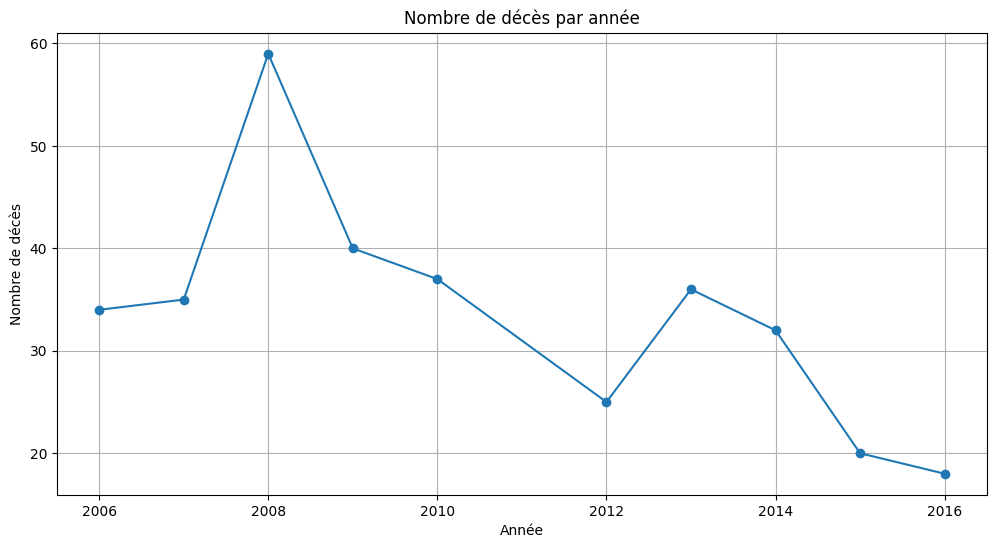


Observations principales :
1. Le nombre de décès montre une forte variation au fil des années
2. On observe une tendance générale à la baisse entre 2008 et 2016
3. Il y a un pic très marqué en 2008, suivi d'une diminution progressive
4. Quelques fluctuations sont notables, notamment une légère remontée en 2012-2014


Année avec le plus de décès: 2008 (59 décès)
Année avec le moins de décès: 2016 (18 décès)




In [25]:
plt.figure(figsize=(12, 6))
deaths_by_year = df.groupby('year')['total_fatalities'].sum()
deaths_by_year.plot(kind='line', marker='o')
plt.title('Nombre de décès par année')
plt.xlabel('Année')
plt.ylabel('Nombre de décès')
plt.grid(True)
plt.show()

# Observations
print("\nObservations principales :")
print("1. Le nombre de décès montre une forte variation au fil des années")
print("2. On observe une tendance générale à la baisse entre 2008 et 2016")
print("3. Il y a un pic très marqué en 2008, suivi d'une diminution progressive")
print("4. Quelques fluctuations sont notables, notamment une légère remontée en 2012-2014")
print("\n")

print(f"Année avec le plus de décès: {deaths_by_year.idxmax()} ({deaths_by_year.max()} décès)")
print(f"Année avec le moins de décès: {deaths_by_year.idxmin()} ({deaths_by_year.min()} décès)")
print("\n")

### Q8
En utilisant la fonction subplot de matplotlib:

1) Affichez le nombre d'accidents par année dans un diagramme à barres.

2) Affichez le nombre de décès par année dans un diagramme à barres.

Nommez vos axes et donnez un titre à votre graphique.
En comparant ceux-ci, observez-vous une relation entre le nombre de décès et d'accidents? Pouvez-vous justifier la cause du nombre de décès minimal de l'année évoquée dans la question 7?  <b>(5 points)</b>

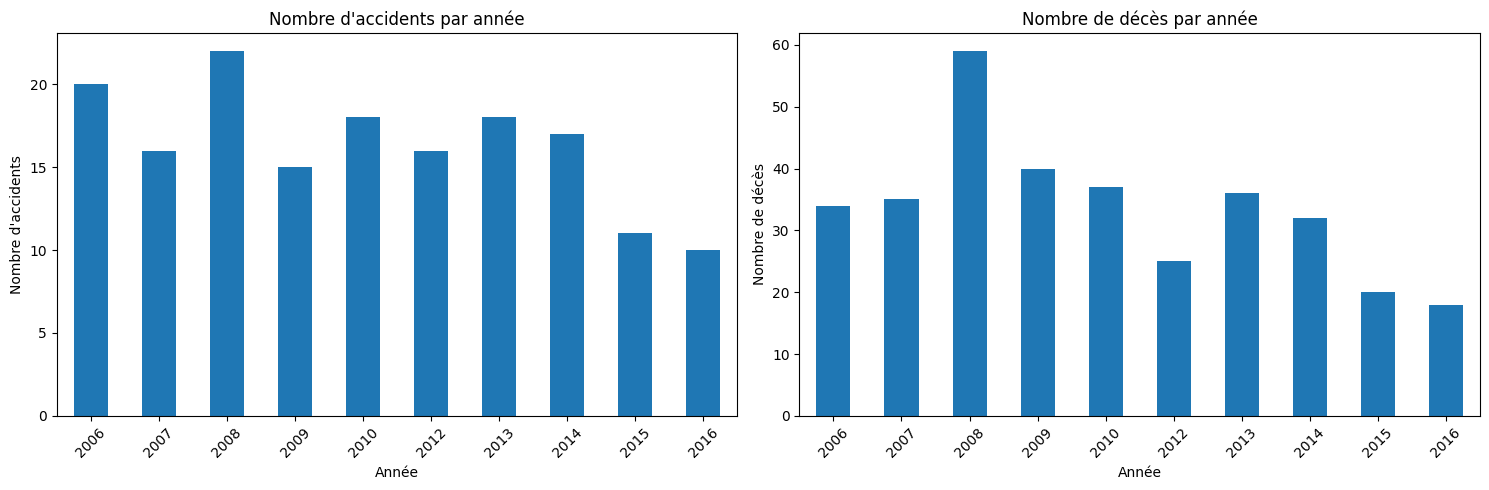


Relation entre le nombre de décès et d'accidents :
1. Il existe une certaine corrélation entre le nombre d'accidents et le nombre de décès, mais elle n'est pas parfaitement proportionnelle
2. L'année 2006 montre clairement cette disparité : elle présente le second plus grand nombre d'accidents (~29) mais pas nécessairement le second plus grand nombre de décès (~34)
3. On observe une tendance générale à la baisse tant pour les accidents que pour les décès entre 2008 et 2016
4. La diminution est plus marquée pour les décès que pour les accidents, suggérant une amélioration possible de la sécurité ou de la gestion des accidents

Justification du nombre minimal de décès en 2016 :
1. Le nombre d'accidents en 2016 est le plus bas de la période (~10 accidents)
2. Cette réduction du nombre d'accidents explique naturellement le nombre minimal de décès
3. Le ratio décès/accidents semble également plus favorable en 2016, ce qui pourrait s'expliquer par :
   - Une amélioration des mesures de sécu

In [27]:
plt.figure(figsize=(15, 5))

# Partie 1
plt.subplot(1, 2, 1)
accidents_by_year = df.groupby('year').size()
accidents_by_year.plot(kind='bar')
plt.title('Nombre d\'accidents par année')
plt.xlabel('Année')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation=45)

# Partie 2
plt.subplot(1, 2, 2)
deaths_by_year.plot(kind='bar')
plt.title('Nombre de décès par année')
plt.xlabel('Année')
plt.ylabel('Nombre de décès')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Comparaison
print("\nRelation entre le nombre de décès et d'accidents :")
print("1. Il existe une certaine corrélation entre le nombre d'accidents et le nombre de décès, mais elle n'est pas parfaitement proportionnelle")
print("2. L'année 2006 montre clairement cette disparité : elle présente le second plus grand nombre d'accidents (~29) mais pas nécessairement le second plus grand nombre de décès (~34)")
print("3. On observe une tendance générale à la baisse tant pour les accidents que pour les décès entre 2008 et 2016")
print("4. La diminution est plus marquée pour les décès que pour les accidents, suggérant une amélioration possible de la sécurité ou de la gestion des accidents")
print("\nJustification du nombre minimal de décès en 2016 :")
print("1. Le nombre d'accidents en 2016 est le plus bas de la période (~10 accidents)")
print("2. Cette réduction du nombre d'accidents explique naturellement le nombre minimal de décès")
print("3. Le ratio décès/accidents semble également plus favorable en 2016, ce qui pourrait s'expliquer par :")
print("   - Une amélioration des mesures de sécurité")
print("   - Une meilleure réponse aux situations d'urgence")
print("   - Des accidents potentiellement moins graves (conditions météorologiques plus favorables, meilleure maintenance, etc.)")
print("\n")

## 3. LIVRABLES
Vous devez remettre sur Moodle un fichier compressé .zip contenant :

1) Le code : Un Jupyter notebook en Python qui contient le code tel implanté avec les librairies minimales demandées pour ce TP (Python, Pandas, Matplotlib). Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière. Tous vos résultats doivent être reproductibles avec le code dans le notebook. *Attention, en aucun cas votre code ne doit avoir été copié de d'ailleurs.*

2) Un fichier pdf représentant votre notebook complètement exécuté sous format pdf (obtenu via latex ou imprimé en pdf avec le navigateur). Assurez-vous que le PDF est entièrement lisible. [Tutoriel youtube](https://www.youtube.com/watch?v=-Ti9Mm21uVc)

ATTENTION: assurez-vous que votre fichier compressé .zip ne dépasse pas la taille limite acceptée sur Moodle.


__ÉVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__
1. Implantation correcte et efficace
2. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.) <b>(1 point)</b>
3. Réponses correctes/sensées aux questions de réflexion ou d'analyse

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre. Dans le cas contraire, cela sera considéré comme du plagiat.
- __Règle 2__: Vous êtes libres de discuter avec d'autres équipes. Cependant, vous ne pouvez en aucun cas incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.

### Conversion en PDF sur Google Colab

In [ ]:
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Assurez vous d'avoir téléchargé le TP complété en notebook sur votre ordinateur, puis importé ce fichier dans le répertoire "content" avant de rouler la ligne suivante.

In [ ]:
!jupyter nbconvert --to pdf /content/TP1.ipynb